## IMPORT LIBRARY


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


## LOAD DATA


In [3]:
data = pd.read_csv('../data/preprocced_sales_data.csv')

Make a encoding data


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606600 entries, 0 to 1606599
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   date_block_num      1606600 non-null  int64 
 1   shop_id             1606600 non-null  int64 
 2   item_id             1606600 non-null  int64 
 3   item_cnt_month      1606600 non-null  int64 
 4   item_name           1606600 non-null  object
 5   item_category_id    1606600 non-null  int64 
 6   shop_name           1606600 non-null  object
 7   item_category_name  1606600 non-null  object
dtypes: int64(5), object(3)
memory usage: 98.1+ MB


- Label encoding


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['shop_id'] = label_encoder.fit_transform(data['shop_id'])
data['item_category_id'] = label_encoder.fit_transform(data['item_category_id'])

- One hot encoding


In [6]:
data = pd.get_dummies(data, columns=['item_category_name'], drop_first=True)

- Drop column **item_name**


In [7]:
data = data.drop(columns=['item_name'])
data = data.drop(columns=['shop_name'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606600 entries, 0 to 1606599
Data columns (total 88 columns):
 #   Column                                                       Non-Null Count    Dtype
---  ------                                                       --------------    -----
 0   date_block_num                                               1606600 non-null  int64
 1   shop_id                                                      1606600 non-null  int64
 2   item_id                                                      1606600 non-null  int64
 3   item_cnt_month                                               1606600 non-null  int64
 4   item_category_id                                             1606600 non-null  int64
 5   item_category_name_Аксессуары - PS2                          1606600 non-null  bool 
 6   item_category_name_Аксессуары - PS3                          1606600 non-null  bool 
 7   item_category_name_Аксессуары - PS4                          1606600 non

Separete feature & target


In [9]:
X = data.drop(columns=['item_cnt_month'])
y = data['item_cnt_month']

## SPLIT DATA


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TRAIN MODEL


In [11]:
# init model
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# predict data in data 'test'
y_pred = model.predict(X_test)

## EVALUASI MODEL


In [12]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

MSE: 53.98
MAE: 1.55
R2: 0.27


SAVE MODEL TRAINING


In [13]:
# joblib.dump(model, 'linear_regression_model.pkl')

SAVE MODEL FORECASTING


In [14]:
# forecast_result = pd.DataFrame({
#     'Actual' : y_test,
#     'Predicted' : y_pred,
# })

# # forecast_result.to_csv('forecast_results.csv', index=False)

## VISUALIZATION


In [15]:
forecast_results = pd.read_csv("../data/forecast_results.csv")
historical_data = pd.read_csv("../data/sales_train.csv", parse_dates=True)
historical_data['date'] = pd.to_datetime(historical_data['date'], format="%d.%M.%Y")

In [16]:
# Data Actual dan Predicted
actual = forecast_results['Actual']
predicted = forecast_results['Predicted']

# Hitung IQR
Q1_actual = np.percentile(actual, 25)
Q3_actual = np.percentile(actual, 75)
IQR_actual = Q3_actual - Q1_actual

Q1_predicted = np.percentile(predicted, 25)
Q3_predicted = np.percentile(predicted, 75)
IQR_predicted = Q3_predicted - Q1_predicted

# Tentukan batas (lower dan upper) untuk outliers
lower_actual = Q1_actual - 1.5 * IQR_actual
upper_actual = Q3_actual + 1.5 * IQR_actual

lower_predicted = Q1_predicted - 1.5 * IQR_predicted
upper_predicted = Q3_predicted + 1.5 * IQR_predicted

# Filter data yang tidak outliers
filtered_data = forecast_results[
    (forecast_results['Actual'] >= lower_actual) & 
    (forecast_results['Actual'] <= upper_actual) &
    (forecast_results['Predicted'] >= lower_predicted) &
    (forecast_results['Predicted'] <= upper_predicted)
]

print(f"Data sebelum di-filter: {forecast_results.shape}")
print(f"Data setelah di-filter: {filtered_data.shape}")


Data sebelum di-filter: (321320, 2)
Data setelah di-filter: (275311, 2)


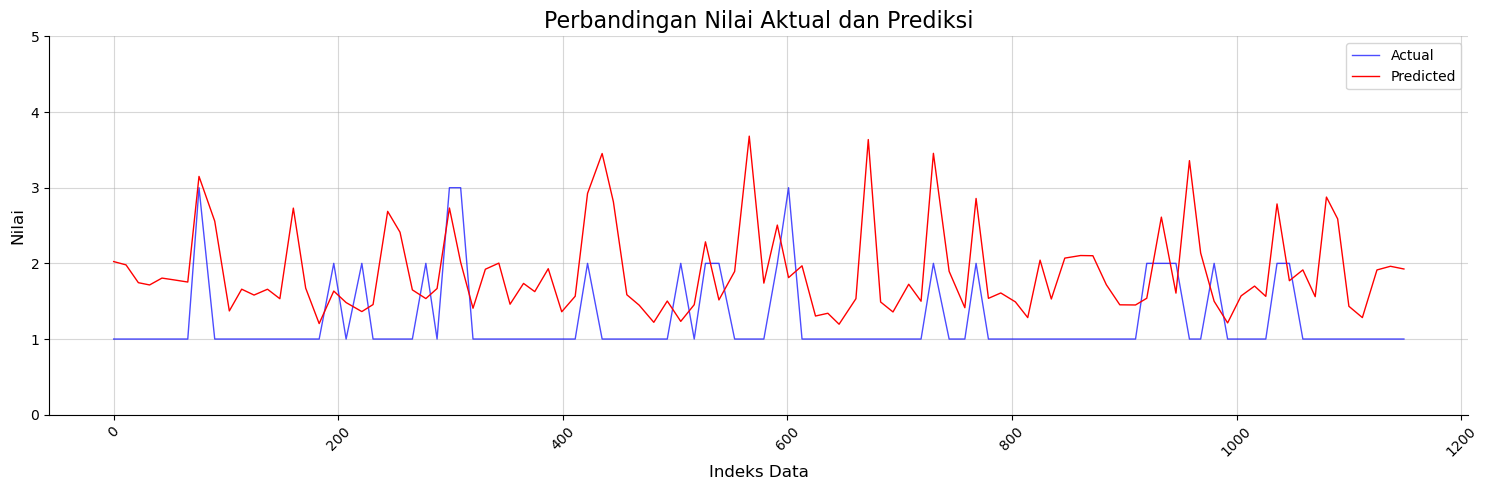

In [36]:
# Sampling data (ambil setiap 10 baris untuk mengurangi kepadatan)
subset_data = filtered_data.iloc[:1000:10]

plt.figure(figsize=(15, 5))

sns.lineplot(data=subset_data, x=subset_data.index, y='Actual', label='Actual', color='blue', alpha=0.7, linewidth=1)
sns.lineplot(data=subset_data, x=subset_data.index, y='Predicted', label='Predicted', color='red', linewidth=1)

plt.title('Perbandingan Nilai Aktual dan Prediksi', fontsize=16)
plt.xlabel('Indeks Data', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.5)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.ylim(0, 5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_6036\4200383959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Category'] = historical_data['shop_id']  # Contoh tambahkan kolom kategori


<Figure size 1000x600 with 0 Axes>

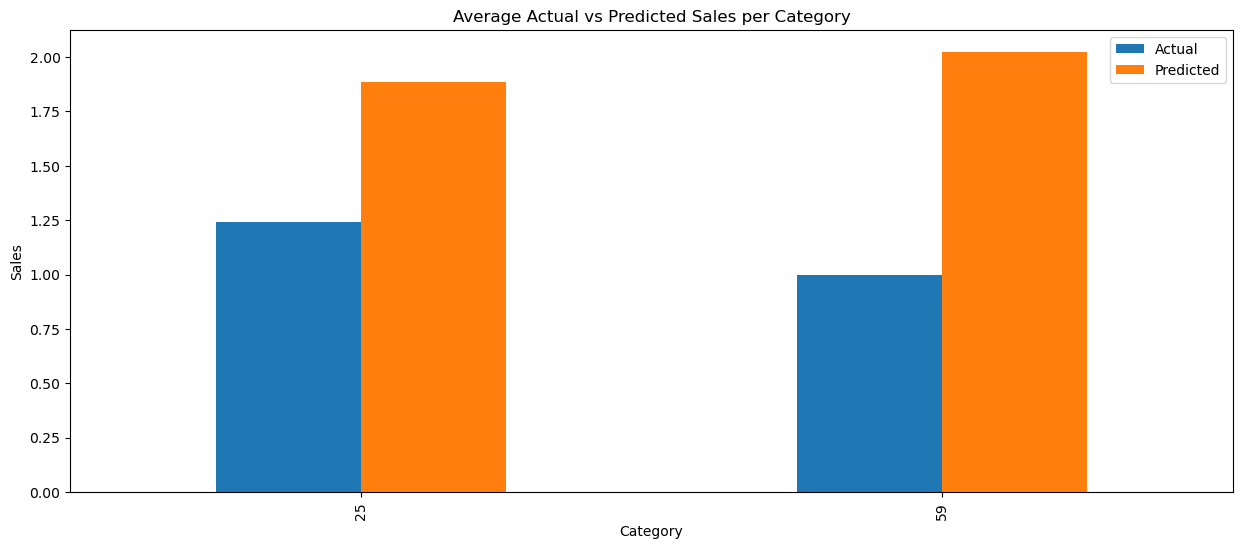

In [39]:
# Contoh: Rata-rata sales per kategori
subset_data['Category'] = historical_data['shop_id']  # Contoh tambahkan kolom kategori
avg_forecast = subset_data.groupby('Category').mean()

# Plot data rata-rata
plt.figure(figsize=(10, 6))
avg_forecast[['Actual', 'Predicted']].plot(kind='bar', figsize=(15, 6))
plt.title('Average Actual vs Predicted Sales per Category')
plt.ylabel('Sales')
plt.show()


## RESULT

---

Hasil dari forecasting adalah :

- hasil prediksi mengalami kenaikan, artinya jumlah barang yang akan terjual di masa depan nanti akan mengalami kenaikan.
- dari **barplot**, menunjukan jika rata-rata category dengan nomor 25 dan 59 diprediksi mengalami kenaikan yang banyak yaitu sebesar 1.80 untuk category 25, dan 2 untuk kategori 59.
